Context:
This dataset contains product listings from Vestiaire, an online marketplace for buying and selling pre-owned luxury fashion items. It was scraped using Python and the Hrequests Library. The CSV file contains approximately 900k rows and 36 columns.

Inspiration:
1) Trend Analysis:- Investigate current trends in second-hand luxury fashion, such as brands, product types, and item pricing, to gain a deeper understanding of the current market trends.
2) Geographical Analysis:- Analyze which countries are the most active in terms of both buyers and sellers on Vestiaire Collective. Look for trends in user demographics, such as regions with a high concentration of second-hand luxury fashion.
3) Item Price Prediction:- Utilize machine learning algorithms to predict the price of listed items based on various available features.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

In [234]:
path= 'Vestiaire.csv'
data= pd.read_csv(path)
data.shape

(900514, 36)

In [235]:
data.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [4]:
data.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [6]:
(data.isnull().sum()/(len(data)))*100

product_id                     0.000000
product_type                   0.000000
product_name                   0.000000
product_description            0.000777
product_keywords               0.131369
product_gender_target          0.000000
product_category               0.131369
product_season                 0.000222
product_condition              0.000000
product_like_count             0.000000
sold                           0.000000
reserved                       0.000000
available                      0.000000
in_stock                       0.000000
should_be_gone                 0.000000
brand_id                       0.000000
brand_name                     0.000000
brand_url                      0.000000
product_material               0.000444
product_color                  0.000111
price_usd                      0.000000
seller_price                   0.000000
seller_earning                 0.000000
seller_badge                   0.000000
has_cross_border_fees          1.525351


In [236]:
data['usually_ships_within']= data['usually_ships_within'].fillna(data['usually_ships_within'].mode())
data['product_season']= data['product_season'].fillna('Spring / Summer')
data['buyers_fees']= data['buyers_fees'].fillna(data['buyers_fees'].median())
data.dropna(axis=0,inplace=True)

def concatenate_columns(df, columns, new_column_name):
    df[new_column_name] = df[columns[0]].astype(str) + ' ' + df[columns[1]].astype(str)
    return df

data= concatenate_columns(data, ['brand_name','product_type'], 'product_new_keywords')

data.drop(['product_keywords','product_name','product_description','reserved','sold','should_be_gone','has_cross_border_fees'],axis=1,inplace=True)

data.rename(mapper={'product_gender_target':'target_audience','product_like_count':'product_likes',
                          'seller_num_products_listed':'seller_listed_products_for_sale',
                          'product_new_keywords':'product_name'
                          },axis=1,inplace=True)


num_cols=data.drop(['product_id','brand_id','seller_id'],axis=1).select_dtypes(include=np.number)
cat_cols=data.select_dtypes(include=['object','bool'])

In [87]:
data.shape

(732221, 30)

In [88]:
num_cols.columns

Index(['product_likes', 'price_usd', 'seller_price', 'seller_earning',
       'buyers_fees', 'seller_products_sold',
       'seller_listed_products_for_sale', 'seller_community_rank',
       'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [89]:
cat_cols.columns

Index(['product_type', 'target_audience', 'product_category', 'product_season',
       'product_condition', 'available', 'in_stock', 'brand_name', 'brand_url',
       'product_material', 'product_color', 'seller_badge', 'warehouse_name',
       'seller_username', 'usually_ships_within', 'seller_country',
       'product_name'],
      dtype='object')

In [62]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
product_likes,732221.0,5.955014,11.401167,0.00,1.00,2.00,7.00,1197.00
price_usd,732221.0,373.757582,1571.073893,6.13,83.60,169.40,345.06,632610.00
seller_price,732221.0,320.032084,1347.283106,5.11,71.36,143.78,298.20,527175.00
seller_earning,732221.0,279.241489,1260.644917,0.00,57.51,125.08,259.43,509229.75
buyers_fees,732221.0,53.727721,241.831080,0.00,11.72,23.69,49.88,105435.00
seller_products_sold,732221.0,725.477087,3190.416315,0.00,12.00,54.00,235.00,38592.00
seller_listed_products_for_sale,732221.0,1808.129094,6000.050023,0.00,19.00,87.00,550.00,39628.00
seller_community_rank,732221.0,52387.652885,135588.796602,0.00,0.00,29.00,24984.00,1064601.00
seller_num_followers,732221.0,1138.029796,4048.391743,0.00,28.00,104.00,386.00,585583.00
seller_pass_rate,732221.0,81.369999,24.808235,0.00,80.00,90.00,95.40,100.00


In [96]:
for col in num_cols:
    print(f'Skewness of {col}:{num_cols[col].skew()}' )

Skewness of product_likes:11.330295785131757
Skewness of price_usd:122.67121504406191
Skewness of seller_price:114.84077506271214
Skewness of seller_earning:125.8683962443238
Skewness of buyers_fees:150.25681264288434
Skewness of seller_products_sold:9.294071831574808
Skewness of seller_listed_products_for_sale:4.905168408346884
Skewness of seller_community_rank:3.7416990907003265
Skewness of seller_num_followers:13.446887943414806
Skewness of seller_pass_rate:-2.3303437182558326


In [98]:
for col in num_cols:
    print(f'Kurtosis of {col}:{num_cols[col].kurt()}' )

Kurtosis of product_likes:463.88353227260785
Kurtosis of price_usd:39293.46853915115
Kurtosis of seller_price:35176.23308746467
Kurtosis of seller_earning:40127.82079444546
Kurtosis of buyers_fees:53730.80687575657
Kurtosis of seller_products_sold:100.44558233479016
Kurtosis of seller_listed_products_for_sale:25.029646949527507
Kurtosis of seller_community_rank:15.738288775730625
Kurtosis of seller_num_followers:1218.4729760205307
Kurtosis of seller_pass_rate:4.842515016849484


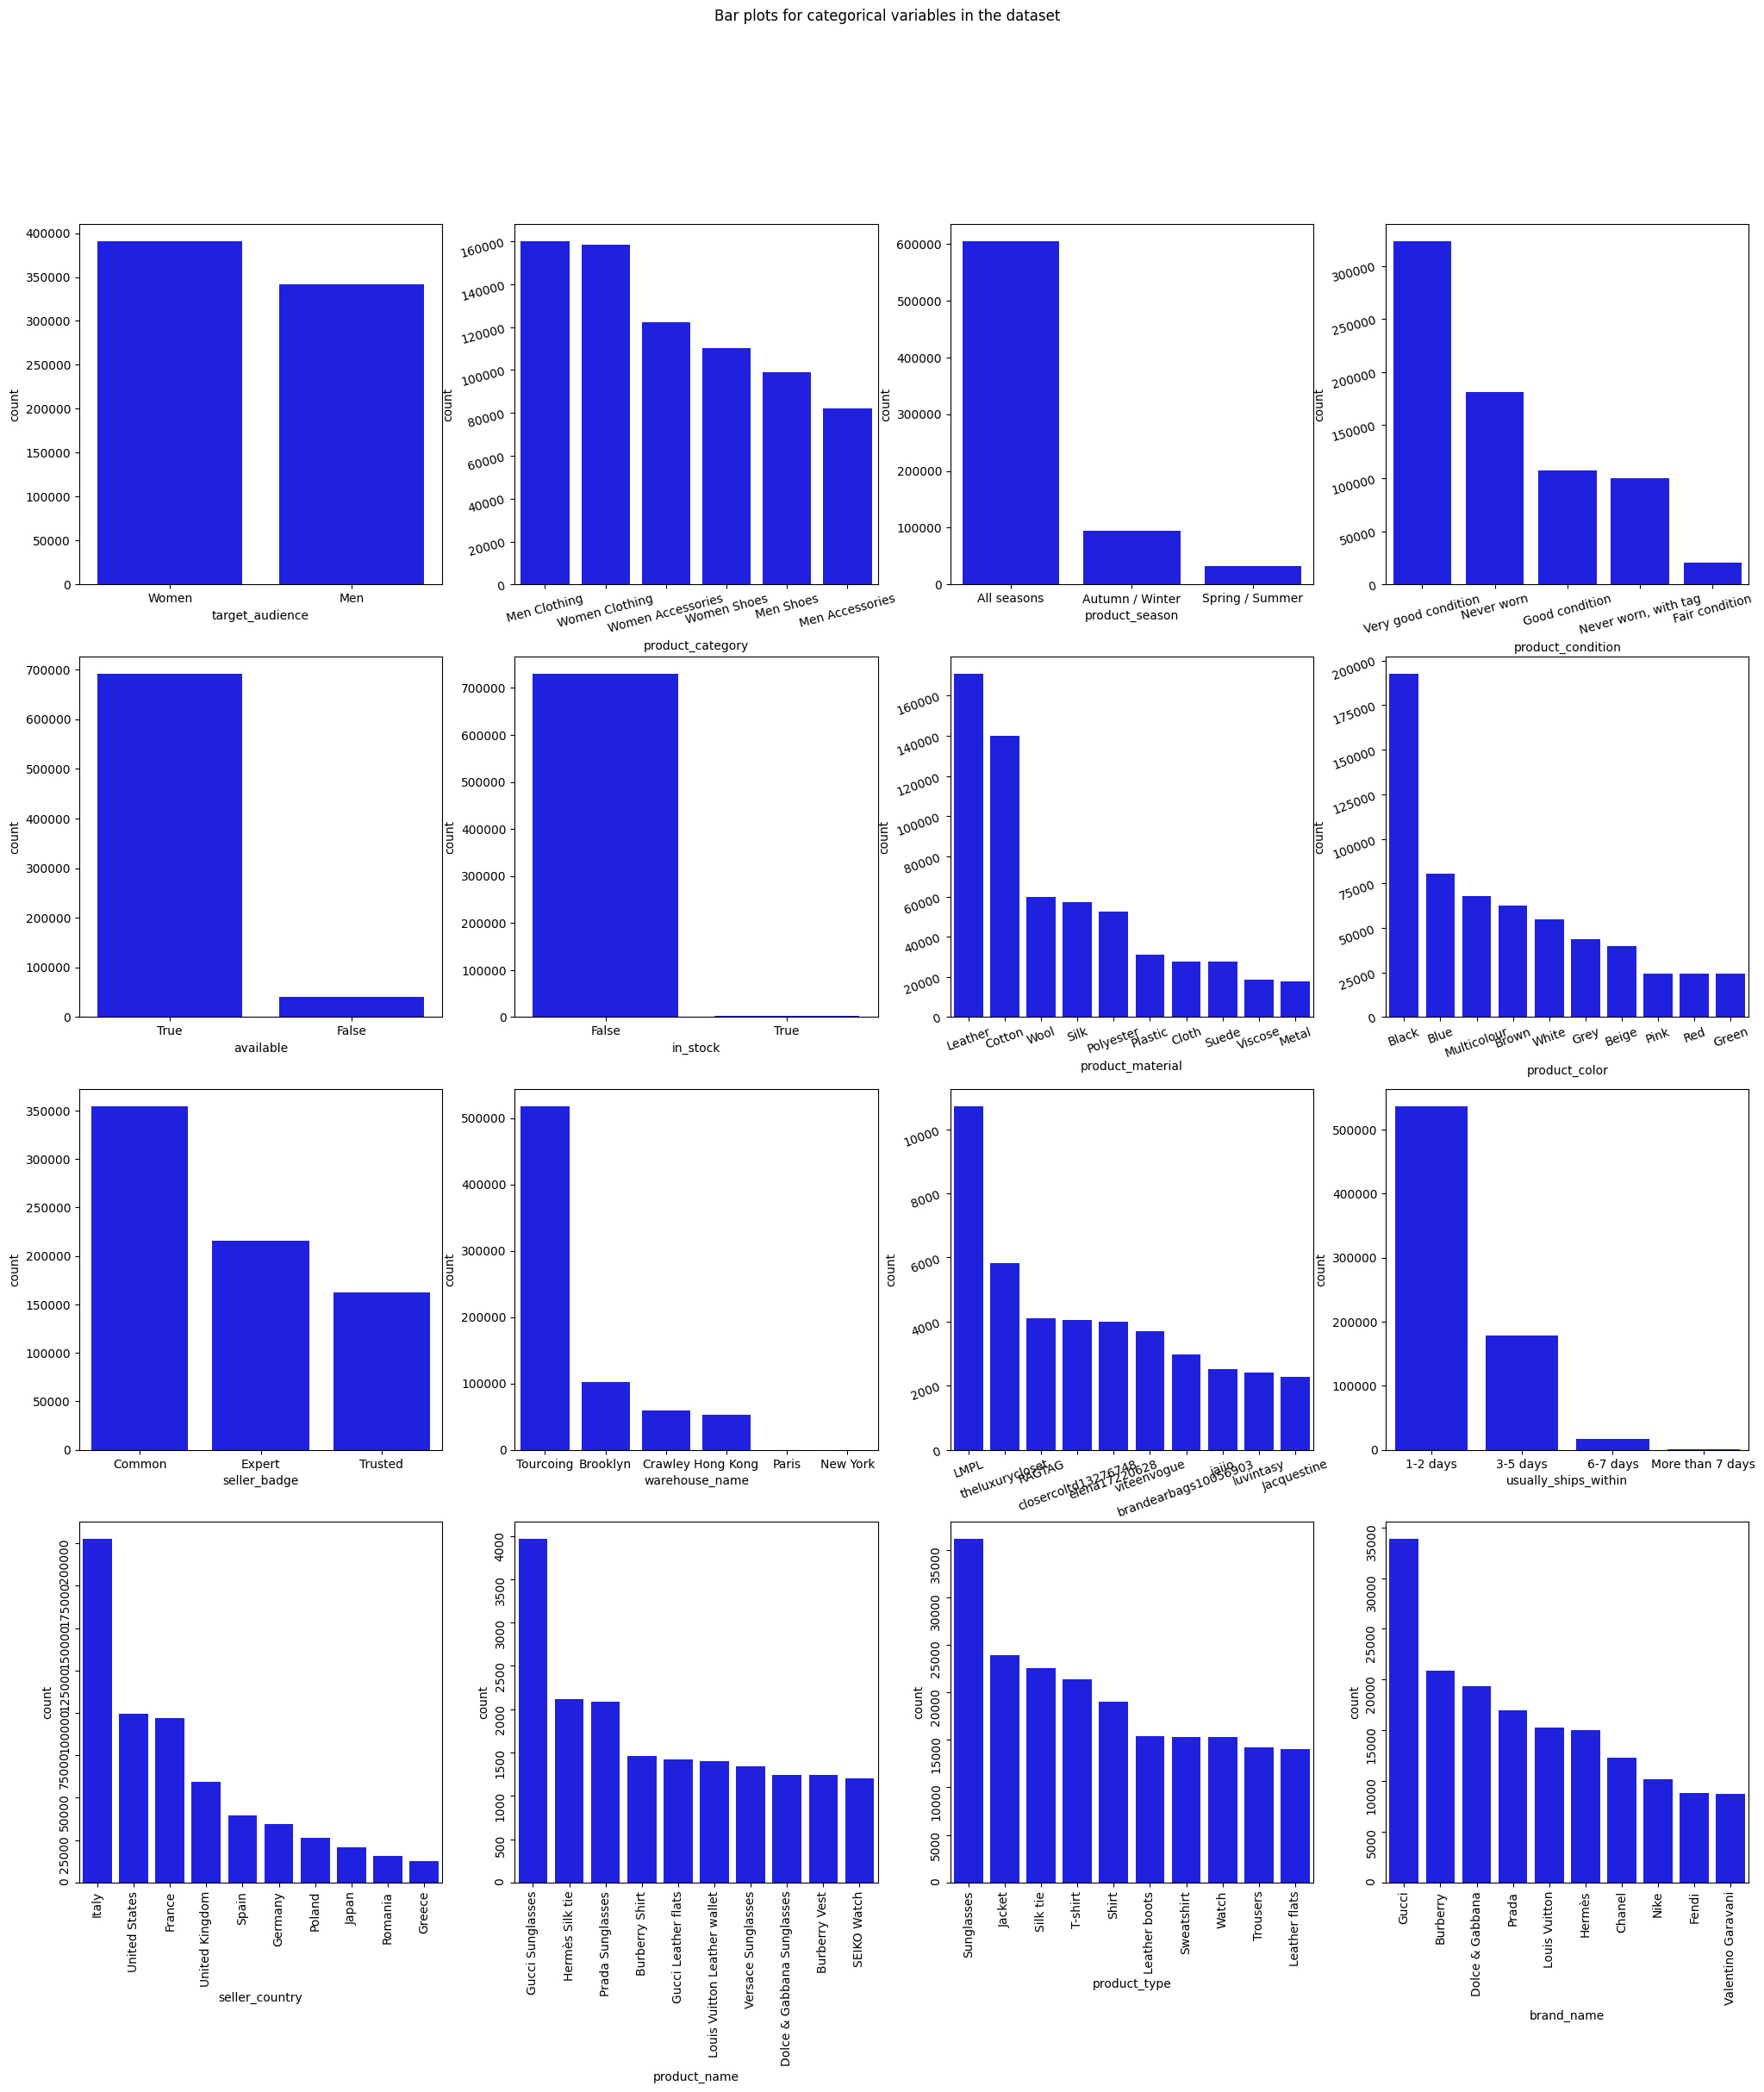

In [81]:
fig, axes = plt.subplots(4, 4, figsize = (25, 25))
fig.suptitle('Bar plots for categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'target_audience', data = cat_cols, color = 'blue', 
              order = cat_cols['target_audience'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'product_category', data = cat_cols, color = 'blue', 
              order = cat_cols['product_category'].value_counts().index);
sns.countplot(ax = axes[0, 2], x = 'product_season', data = cat_cols, color = 'blue', 
              order = cat_cols['product_season'].value_counts().index);
sns.countplot(ax = axes[0, 3], x = 'product_condition', data = cat_cols, color = 'blue', 
              order = cat_cols['product_condition'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'available', data = cat_cols, color = 'blue', 
              order = cat_cols['available'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'in_stock', data = cat_cols, color = 'blue', 
              order = cat_cols['in_stock'].value_counts().index);
sns.countplot(ax = axes[1, 2], x = 'product_material', data = cat_cols, color = 'blue', 
              order = cat_cols['product_material'].value_counts().head(10).index);
sns.countplot(ax = axes[1, 3], x = 'product_color', data = cat_cols, color = 'blue', 
              order = cat_cols['product_color'].value_counts().head(10).index);
sns.countplot(ax = axes[2, 0], x = 'seller_badge', data = cat_cols, color = 'blue', 
              order = cat_cols['seller_badge'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'warehouse_name', data = cat_cols, color = 'blue', 
              order = cat_cols['warehouse_name'].value_counts().index);
sns.countplot(ax = axes[2, 2], x = 'seller_username', data = cat_cols, color = 'blue', 
              order = cat_cols['seller_username'].value_counts().head(10).index);
sns.countplot(ax = axes[2, 3], x = 'usually_ships_within', data = cat_cols, color = 'blue', 
              order = cat_cols['usually_ships_within'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'seller_country', data = cat_cols, color = 'blue', 
              order = cat_cols['seller_country'].value_counts().head(10).index);
sns.countplot(ax = axes[3, 1], x = 'product_name', data = cat_cols, color = 'blue', 
              order = cat_cols['product_name'].value_counts().head(10).index);
sns.countplot(ax = axes[3, 2], x = 'product_type', data = cat_cols, color = 'blue', 
              order = cat_cols['product_type'].value_counts().head(10).index);
sns.countplot(ax = axes[3, 3], x = 'brand_name', data = cat_cols, color = 'blue', 
              order = cat_cols['brand_name'].value_counts().head(10).index);

axes[0][1].tick_params(labelrotation=15);
axes[0][3].tick_params(labelrotation=15);
axes[1][2].tick_params(labelrotation=20);
axes[1][3].tick_params(labelrotation=20);
axes[2][2].tick_params(labelrotation=20);
axes[3][0].tick_params(labelrotation=90);
axes[3][1].tick_params(labelrotation=90);
axes[3][2].tick_params(labelrotation=90);
axes[3][3].tick_params(labelrotation=90);

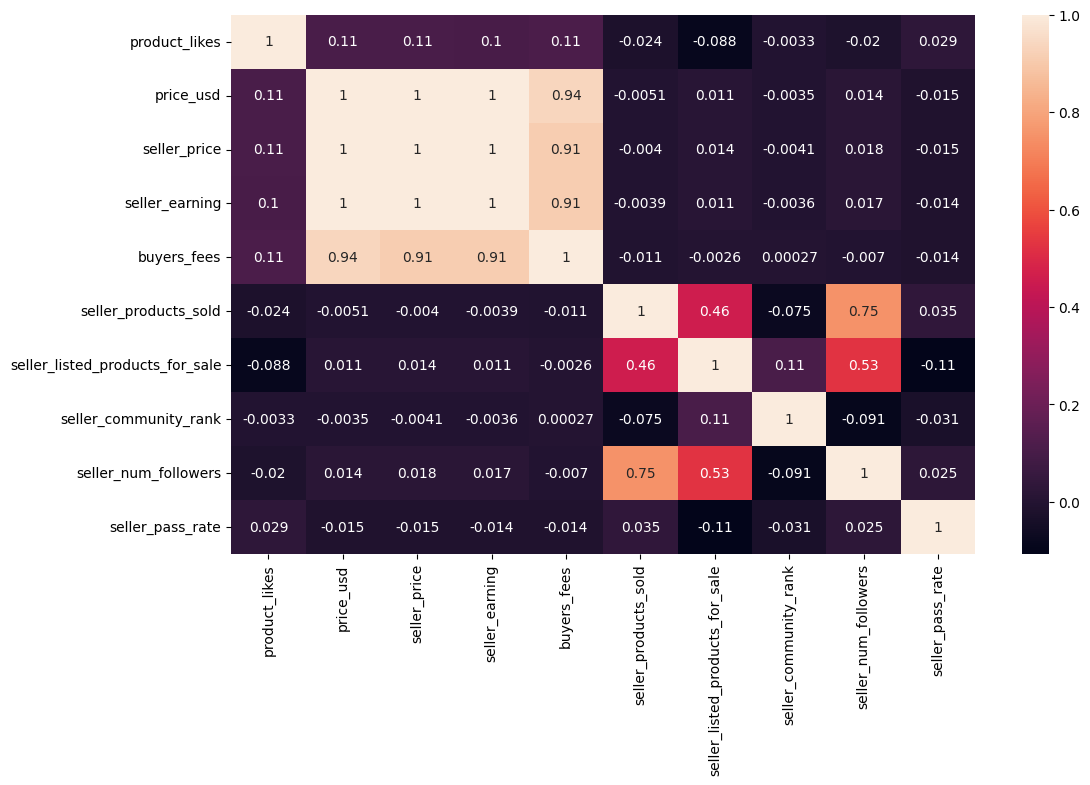

In [25]:
plt.figure(figsize=(12, 7))
sns.heatmap(num_cols.corr(), annot = True)
plt.show()

<Axes: xlabel='seller_price', ylabel='price_usd'>

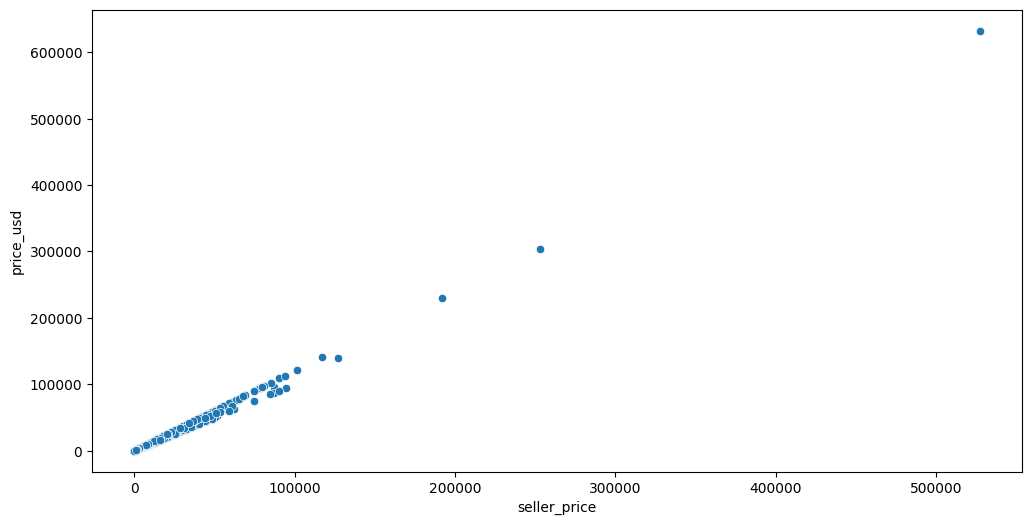

In [26]:
sns.scatterplot(data=num_cols,x='seller_price',y='price_usd')

<Axes: xlabel='seller_earning', ylabel='price_usd'>

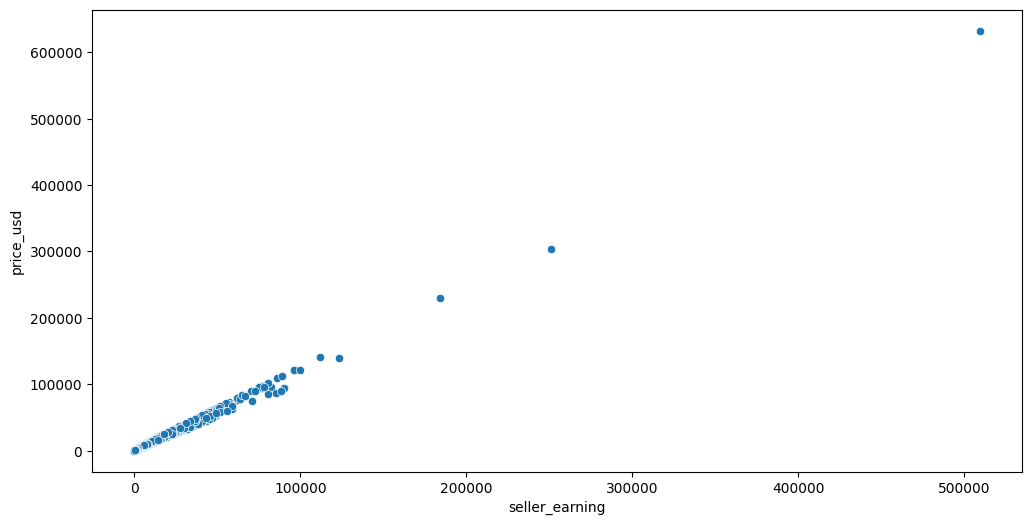

In [27]:
sns.scatterplot(data=num_cols,x='seller_earning',y='price_usd')

<Axes: xlabel='seller_price', ylabel='seller_earning'>

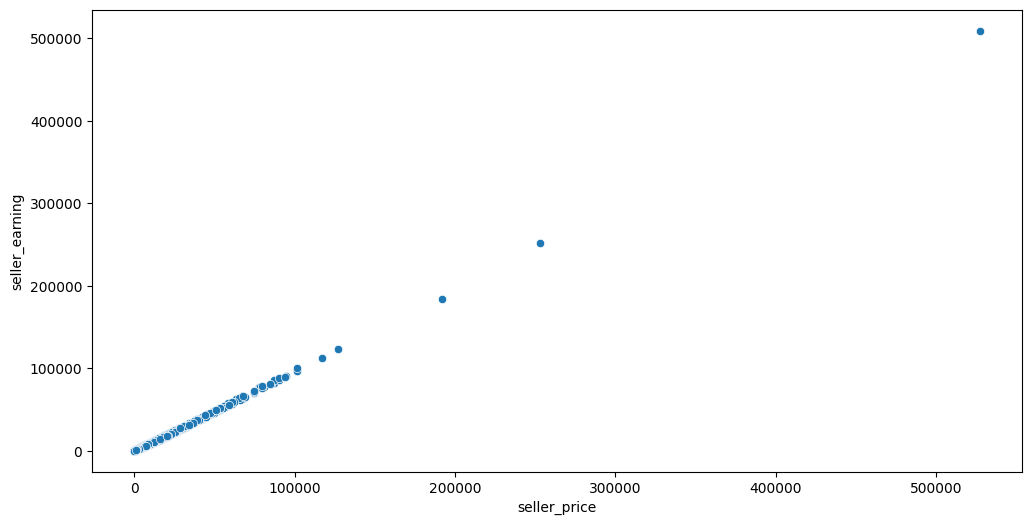

In [28]:
sns.scatterplot(data=num_cols,x='seller_price',y='seller_earning')

<Axes: xlabel='buyers_fees', ylabel='price_usd'>

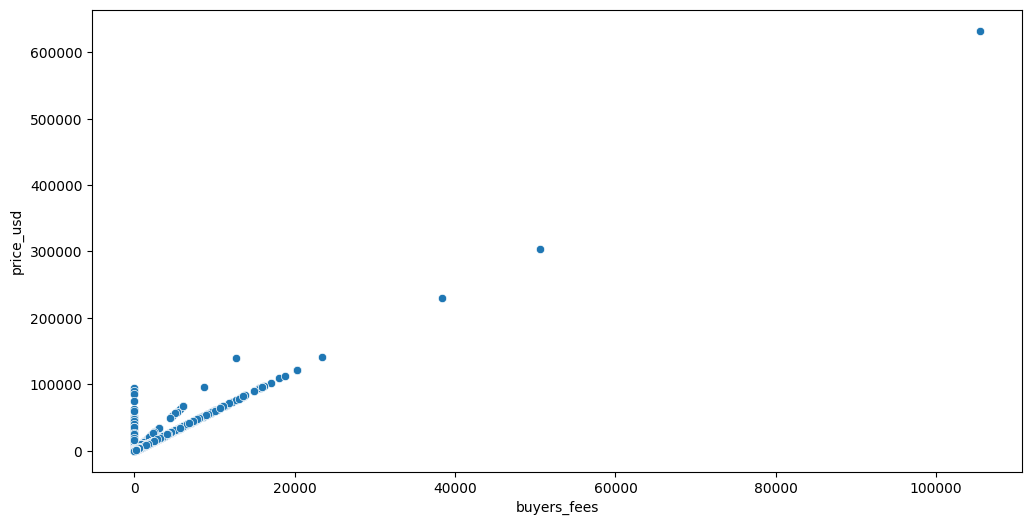

In [29]:
sns.scatterplot(data=num_cols,x='buyers_fees',y='price_usd')

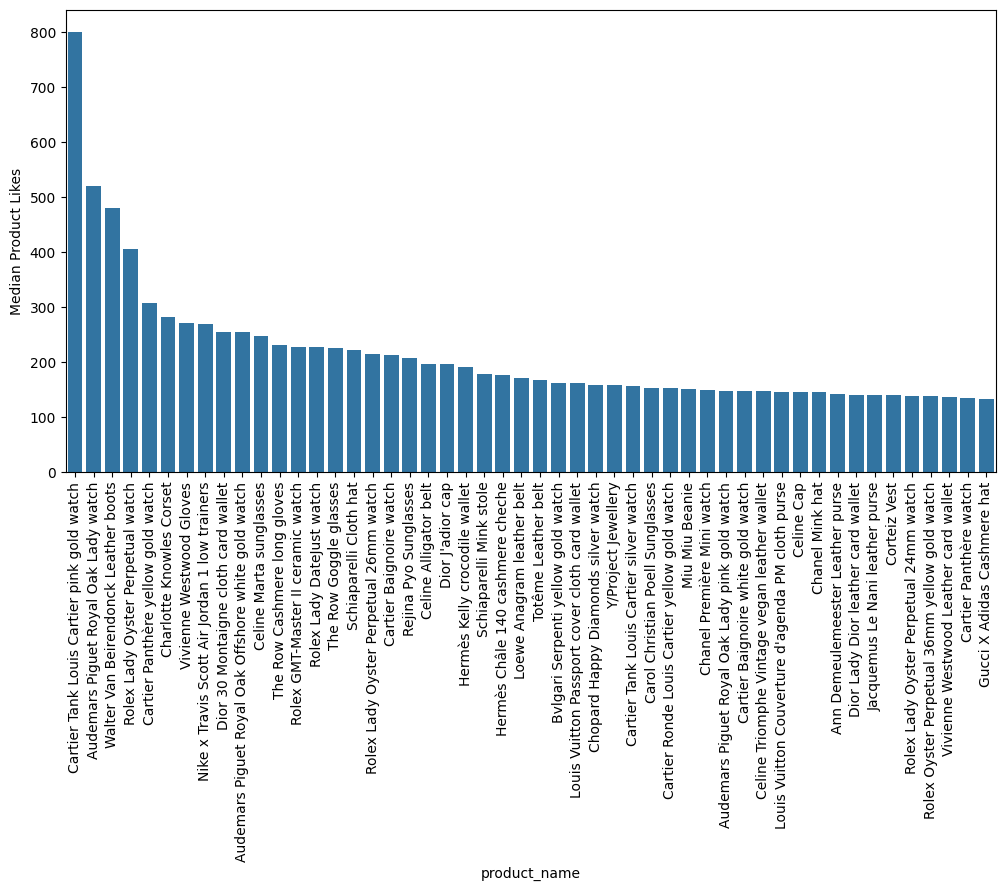

In [143]:
products_likes= data.groupby('product_name')['product_likes'].median().reset_index().sort_values(by='product_likes',ascending=False)
sns.barplot(data=products_likes,x=products_likes.iloc[0:50,0],y=products_likes.iloc[0:50,1],errorbar=None)
plt.xticks(rotation=90)
plt.ylabel('Median Product Likes')
plt.show()

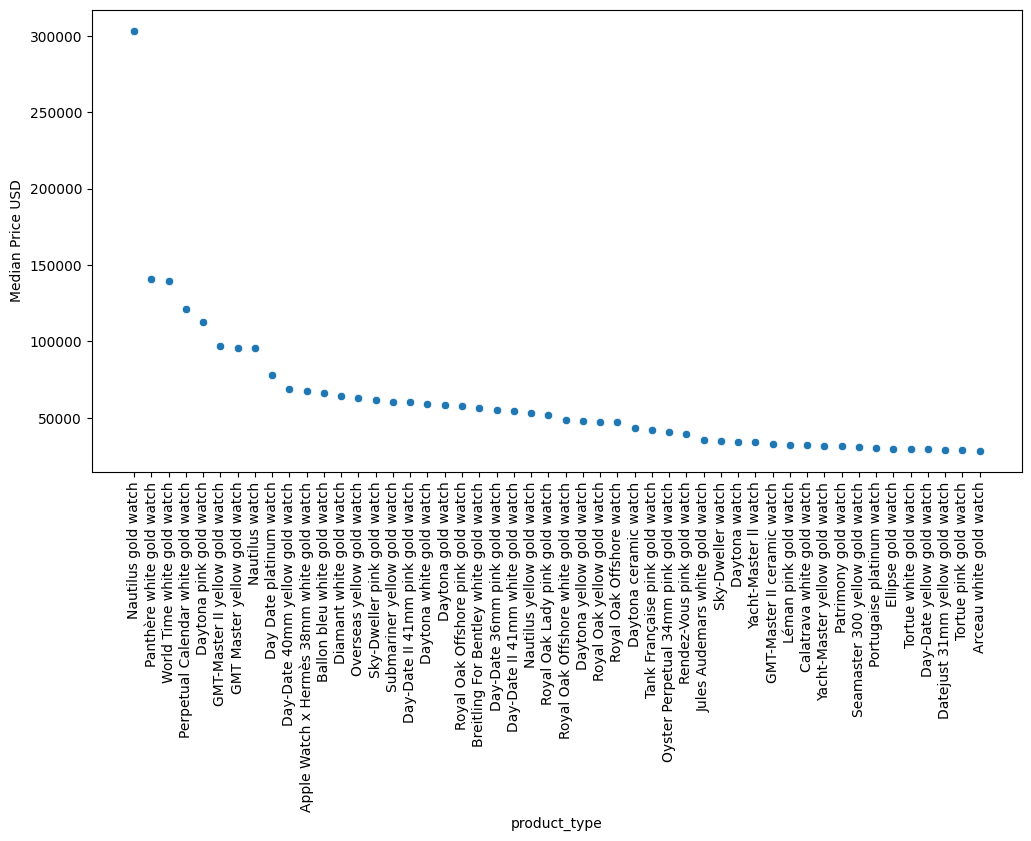

In [145]:
products_price_type= data.groupby('product_type')['price_usd'].median().reset_index().sort_values(by='price_usd',ascending=False)
sns.scatterplot(data=products_price_type,x=products_price_type.iloc[0:50,0],y=products_price_type.iloc[0:50,1])
plt.xticks(rotation=90)
plt.ylabel('Median Price USD')
plt.show()

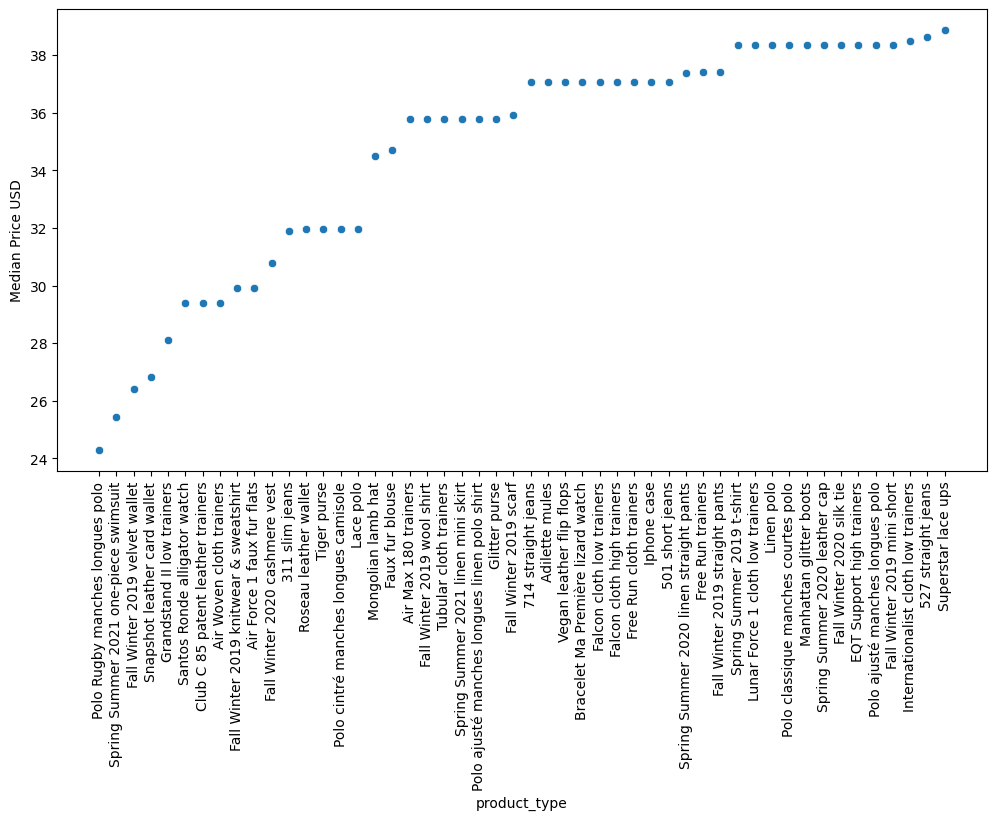

In [146]:
products_price_type= data.groupby('product_type')['price_usd'].median().reset_index().sort_values(by='price_usd')
sns.scatterplot(data=products_price_type,x=products_price_type.iloc[0:50,0],y=products_price_type.iloc[0:50,1])
plt.xticks(rotation=90)
plt.ylabel('Median Price USD')
plt.show()

([<matplotlib.patches.Wedge at 0x266de44d550>,
 [Text(-0.7337151075575129, 0.8195499624439424, '1-2 days'),
  Text(0.6691187230687783, -0.8730865560978521, '3-5 days'),
  Text(1.0963539583846509, -0.0894874177429827, '6-7 days'),
  Text(1.0999853964792388, -0.00566811541979179, 'More than 7 days')],
 [Text(-0.40020824048591613, 0.44702725224215034, '73.24%'),
  Text(0.36497384894660634, -0.4762290305988284, '24.33%'),
  Text(0.5980112500279914, -0.04881131876889965, '2.26%'),
  Text(0.599992034443221, -0.0030916993198864305, '0.16%')])

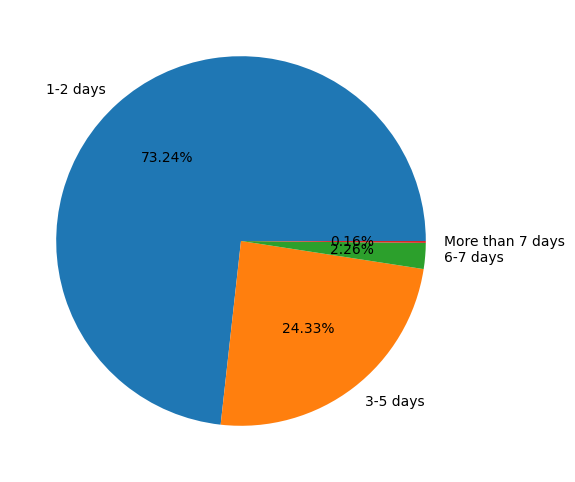

In [37]:
shipment_values= cat_cols['usually_ships_within'].value_counts().values
shipment_index= cat_cols['usually_ships_within'].value_counts().index
plt.pie(shipment_values,labels=shipment_index,autopct="%1.2f%%",radius=1)

In [34]:
sellers_rnp= data.groupby(['seller_community_rank','seller_num_followers','seller_pass_rate']).size().reset_index(name='Freq').sort_values(by='seller_community_rank',ascending=False)
sellers_rnp.iloc[:,:3]

,seller_community_rank,seller_num_followers,seller_pass_rate
58412,1064601.0,11.0,100.0
58411,1064537.0,22.0,100.0
58410,1064365.0,15.0,100.0
58409,1064210.0,7.0,100.0
58408,1063986.0,33.0,93.0
...,...,...,...
4251,0.0,147.0,90.0
4252,0.0,147.0,92.0
4253,0.0,147.0,93.0
4254,0.0,147.0,94.0


In [44]:
famous_sellers= data.groupby(['seller_community_rank','seller_username','seller_pass_rate','seller_country','seller_badge']).size().reset_index(name='Freq').sort_values(by='seller_community_rank',ascending=False)
famous_sellers.iloc[:,:5]

,seller_community_rank,seller_username,seller_pass_rate,seller_country,seller_badge
107281,1064601.0,francesco15275475,100.0,Italy,Trusted
107280,1064537.0,clothesclothesclothes,100.0,United Kingdom,Common
107279,1064365.0,sarah200910271413,100.0,France,Common
107278,1064210.0,morgane611513,100.0,France,Common
107277,1063986.0,marj92,93.0,France,Trusted
...,...,...,...,...,...
35757,0.0,maria14076931,100.0,Austria,Common
35756,0.0,maria13966006,0.0,Greece,Common
35755,0.0,maria13934148,0.0,Italy,Common
35754,0.0,maria13923186,100.0,Czech Republic,Trusted


In [71]:
product_categories= data.groupby('product_category').size().reset_index(name='Count')
product_categories

,product_category,Count
0,Men Accessories,82027
1,Men Clothing,160133
2,Men Shoes,99094
3,Women Accessories,122180
4,Women Clothing,158588
5,Women Shoes,110199


In [73]:
in_stock_counts= data[data['in_stock']].groupby('product_category').size()
in_stock_counts

product_category
Men Accessories      133
Men Clothing         485
Men Shoes            208
Women Accessories    255
Women Clothing       482
Women Shoes          307
dtype: int64

In [78]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=product_categories['product_category'],
    y=product_categories['Count'],
    marker_color='blue',
    text=[f"In Stock: {in_stock_counts[cat]}" for cat in product_categories['product_category']],
    textposition='outside',
    textfont=dict(color='white')
))

fig.update_layout(
    
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    margin=dict(l=0, r=0, t=0, b=0),
    xaxis=dict(tickmode='linear', tickfont=dict(color='white')),
    yaxis=dict(tickfont=dict(color='white')),
    xaxis_title=dict(text='Product Category', font=dict(color='white')),
    height=400,
)

In [6]:
season_type_counts = data.groupby(['product_season','product_type']).size().reset_index(name='Count')

In [29]:
all_season= season_type_counts[season_type_counts['product_season']=='All seasons']
top_product_types_all = all_season.groupby('product_type')['Count'].sum().nlargest(10).reset_index()
top_product_types_all['season']= 'All seasons'
top_product_types_all

,product_type,Count,season
0,Sunglasses,36115,All seasons
1,Jacket,23737,All seasons
2,Silk tie,22527,All seasons
3,T-shirt,21330,All seasons
4,Shirt,19034,All seasons
5,Leather boots,15378,All seasons
6,Sweatshirt,15315,All seasons
7,Watch,15286,All seasons
8,Trousers,14204,All seasons
9,Leather flats,13992,All seasons


In [30]:
aw_season= season_type_counts[season_type_counts['product_season']=='Autumn / Winter']
top_product_types_aw = aw_season.groupby('product_type')['Count'].sum().nlargest(10).reset_index()
top_product_types_aw['season']= 'Autumn / Winter'
top_product_types_aw

,product_type,Count,season
0,Wool pull,5944,Autumn / Winter
1,Wool coat,5636,Autumn / Winter
2,Wool scarf,4924,Autumn / Winter
3,Wool jacket,4722,Autumn / Winter
4,Silk scarf,3951,Autumn / Winter
5,Wool vest,3795,Autumn / Winter
6,Puffer,3775,Autumn / Winter
7,Wool scarf & pocket square,3050,Autumn / Winter
8,Wool hat,2960,Autumn / Winter
9,Wool trousers,2802,Autumn / Winter


In [31]:
ss_season= season_type_counts[season_type_counts['product_season']=='Spring / Summer']
top_product_types_ss = ss_season.groupby('product_type')['Count'].sum().nlargest(10).reset_index()
top_product_types_ss['season']= 'Spring / Summer'
top_product_types_ss

,product_type,Count,season
0,Leather sandal,4995,Spring / Summer
1,Sandals,2644,Spring / Summer
2,Leather sandals,1761,Spring / Summer
3,Short,1641,Spring / Summer
4,Sandal,1396,Spring / Summer
5,Two-piece swimsuit,1207,Spring / Summer
6,Vest,1175,Spring / Summer
7,One-piece swimsuit,1127,Spring / Summer
8,Cloth sandal,1069,Spring / Summer
9,Bermuda,1019,Spring / Summer


In [32]:
filtered_data_top = pd.concat([top_product_types_all,top_product_types_aw,top_product_types_ss])
filtered_data_top

,product_type,Count,season
0,Sunglasses,36115,All seasons
1,Jacket,23737,All seasons
2,Silk tie,22527,All seasons
3,T-shirt,21330,All seasons
4,Shirt,19034,All seasons
5,Leather boots,15378,All seasons
6,Sweatshirt,15315,All seasons
7,Watch,15286,All seasons
8,Trousers,14204,All seasons
9,Leather flats,13992,All seasons


In [33]:
fig = px.scatter(
    filtered_data_top,
    x='season',
    y='Count',
    color='product_type',
    title='Top Product Types by Seasons',
    labels={'product_type': 'Product Type', 'Count': 'Number of Products'},
    template='plotly_white'
)

fig.update_layout(
    plot_bgcolor='rgba(255, 255, 255, 255)',
    paper_bgcolor='rgba(255, 255, 255, 255)',
    font=dict(color='black'),
    xaxis_title='Season',
    yaxis_title='Number of Products',
    margin=dict(l=20, r=20, t=20, b=20),  
    width=900, 
    height=600
)

In [125]:
seasonal_prices = data.groupby('product_season')['price_usd'].median().reset_index()
seasonal_prices

,product_season,price_usd
0,All seasons,166.14
1,Autumn / Winter,190.42
2,Spring / Summer,191.70


In [126]:
fig = px.line(
    seasonal_prices,
    x='product_season',
    y='price_usd',
    title='Price Trend Across Seasons',
    labels={'product_season': 'Season', 'price_usd': 'Median Price (USD)'},
    template='plotly_white',
    markers=True
)

fig.update_layout(
    plot_bgcolor='rgba(255, 255, 255, 255)',
    paper_bgcolor='rgba(255, 255, 255, 255)',
    font=dict(color='black'),
    xaxis_title='Season',
    yaxis_title='Median Price (USD)'
)

In [89]:
def log_transform_with_shift(df, columns):
    excluded_columns=['product_id','brand_id','seller_id']

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]) and not pd.api.types.is_bool_dtype(df[column]):  
            if column is not excluded_columns:
                if (df[column] <= 0).any():
                    shift_value = abs(df[column].min()) + 1
                    df[column] = df[column] + shift_value

                df[column] = np.log(df[column])
    
    return df

data= log_transform_with_shift(data,data.columns)

In [134]:
buyers_preference = data.groupby('seller_country')['seller_products_sold'].mean().reset_index()
buyers_preference.columns = ['seller_country', 'seller_products_sold']

fig_sellers = px.choropleth(
    buyers_preference,
    locations='seller_country',
    locationmode='country names',
    color='seller_products_sold',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig_sellers.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='white')
)

In [135]:
seller_products_counts = data.groupby('seller_country')['seller_listed_products_for_sale'].mean().reset_index()
seller_products_counts.columns = ['seller_country', 'seller_listed_products_for_sale']

fig_sellers = px.choropleth(
    seller_products_counts,
    locations='seller_country',
    locationmode='country names',
    color='seller_listed_products_for_sale',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig_sellers.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='white')
)

In [161]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA

In [246]:
path= 'Vestiaire.csv'
data= pd.read_csv(path)
data.shape

(900514, 36)

In [247]:
X= data.drop(['price_usd', 'product_id', 'brand_id', 'brand_url', 'seller_id'], axis=1)
y= data['price_usd']

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2,random_state=42)

train_data= pd.concat([X_train,y_train],axis=1)
test_data= pd.concat([X_test,y_test],axis=1)
def log_transform_with_shift(df, columns):

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]) and not pd.api.types.is_bool_dtype(df[column]):  
            if (df[column] <= 0).any():
                shift_value = abs(df[column].min()) + 1
                df[column] = df[column] + shift_value

            df[column] = np.log(df[column])
    
    return df

train_data= log_transform_with_shift(train_data,train_data.columns)
test_data= log_transform_with_shift(test_data,test_data.columns)

train_data['usually_ships_within']= train_data['usually_ships_within'].fillna(train_data['usually_ships_within'].mode())
train_data['product_season']= train_data['product_season'].fillna('Spring / Summer')
train_data['buyers_fees']= train_data['buyers_fees'].fillna(train_data['buyers_fees'].median())
train_data.dropna(axis=0,inplace=True)

def concatenate_columns(df, columns, new_column_name):
    df[new_column_name] = df[columns[0]].astype(str) + ' ' + df[columns[1]].astype(str)
    return df

train_data= concatenate_columns(train_data, ['brand_name','product_type'], 'product_new_keywords')

train_data.drop(['product_keywords','product_name','product_description','reserved','sold','should_be_gone','has_cross_border_fees','seller_price','seller_earning'],axis=1,inplace=True)

train_data.rename(mapper={'product_gender_target':'target_audience','product_like_count':'product_likes',
                          'seller_num_products_listed':'seller_listed_products_for_sale',
                          'product_new_keywords':'product_name'
                          },axis=1,inplace=True)

test_data['usually_ships_within']= test_data['usually_ships_within'].fillna(test_data['usually_ships_within'].mode())
test_data['product_season']= test_data['product_season'].fillna('Spring / Summer')
test_data['buyers_fees']= test_data['buyers_fees'].fillna(test_data['buyers_fees'].median())
test_data.dropna(axis=0,inplace=True)

def concatenate_columns(df, columns, new_column_name):
    df[new_column_name] = df[columns[0]].astype(str) + ' ' + df[columns[1]].astype(str)
    return df

test_data= concatenate_columns(test_data, ['brand_name','product_type'], 'product_new_keywords')

test_data.drop(['product_keywords','product_name','product_description','reserved','sold','should_be_gone','has_cross_border_fees','seller_price','seller_earning'],axis=1,inplace=True)

test_data.rename(mapper={'product_gender_target':'target_audience','product_like_count':'product_likes',
                          'seller_num_products_listed':'seller_listed_products_for_sale',
                          'product_new_keywords':'product_name'
                          },axis=1,inplace=True)

X_train= train_data.drop(['price_usd'], axis=1)
y_train= train_data['price_usd']
X_test= test_data.drop(['price_usd'], axis=1)
y_test= test_data['price_usd']

def labelencoder_train(df):
    for c in df.columns:
        if df[c].dtype=='object' or df[c].dtype=='bool': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

X_train_encoded= labelencoder_train(X_train)

def labelencoder_test(df):
    for c in df.columns:
        if df[c].dtype=='object' or df[c].dtype=='bool': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            df[c] = lbl.transform(df[c].values)
    return df

X_test_encoded= labelencoder_train(X_test)

scaler= StandardScaler()
X_train_encoded= scaler.fit_transform(X_train_encoded)
X_test_encoded= scaler.transform(X_test_encoded)

pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

In [248]:
linear_model= LinearRegression(n_jobs=-1)

linear_model.fit(X_train_encoded,y_train)
y_pred= linear_model.predict(X_test_encoded)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for LR: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for LR: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for LR: {test_mse}')
print(f'MAE for LR: {test_mae}')

R² with tuned hyperparameters for LR: 0.653146836497365
Adjusted R² with tuned hyperparameters for LR: 0.6530923140000608
MSE for LR: 0.3662783759399505
MAE for LR: 0.3969375232416434


In [250]:
poly_pca= LinearRegression(n_jobs=-1)

poly = PolynomialFeatures(include_bias=True,degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

poly_pca.fit(X_train_poly,y_train)
y_pred= poly_pca.predict(X_test_poly)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for PR pca: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for PR pca: {1 - (1 - test_r2) * ((X_test_poly.shape[0] - 1) / (X_test_poly.shape[0] - X_test_poly.shape[1] - 1))}')
print(f'MSE for PR pca: {test_mse}')
print(f'MAE for PR pca: {test_mae}')

R² with tuned hyperparameters for PR pca: 0.876611203152439
Adjusted R² with tuned hyperparameters for PR pca: 0.8764507945927915
MSE for PR pca: 0.1302990800548538
MAE for PR pca: 0.22864994331187824


In [229]:
model_ridge= Ridge(random_state=42)

model_ridge.fit(X_train_encoded,y_train)
y_pred= model_ridge.predict(X_test_encoded)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for RR: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for RR: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for RR: {test_mse}')
print(f'MAE for RR: {test_mae}')

R² with tuned hyperparameters for RR: 0.6531373140626398
Adjusted R² with tuned hyperparameters for RR: 0.6530827900684861
MSE for RR: 0.36628843167042435
MAE for RR: 0.3969751146509899


In [219]:
model_lasso= Lasso(alpha=0.01,random_state=42)

model_lasso.fit(X_train_encoded,y_train)
y_pred= model_lasso.predict(X_test_encoded)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for PLR: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for PLR: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for PLR: {test_mse}')
print(f'MAE for PLR: {test_mae}')

R² with tuned hyperparameters for PLR: 0.6374508033358879
Adjusted R² with tuned hyperparameters for PLR: 0.6373938135497832
MSE for PLR: 0.38285345190878134
MAE for PLR: 0.4187066546506424


In [222]:
poly_lasso_pca= Lasso(alpha=0.01,random_state=42)

poly = PolynomialFeatures(include_bias=True,degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

poly_lasso_pca.fit(X_train_poly,y_train)
y_pred= poly_lasso_pca.predict(X_test_poly)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for PLR pca: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for PLR pca: {1 - (1 - test_r2) * ((X_test_poly.shape[0] - 1) / (X_test_poly.shape[0] - X_test_poly.shape[1] - 1))}')
print(f'MSE for PLR pca: {test_mse}')
print(f'MAE for PLR pca: {test_mae}')

R² with tuned hyperparameters for PLR pca: 0.8653044579302858
Adjusted R² with tuned hyperparameters for PLR pca: 0.8651293503156048
MSE for PLR pca: 0.14223904979684995
MAE for PLR pca: 0.21555868265478895


In [226]:
poly_ridge_pca= Ridge(alpha=10,random_state=42)

poly = PolynomialFeatures(include_bias=True,degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

poly_ridge_pca.fit(X_train_poly,y_train)
y_pred= poly_ridge_pca.predict(X_test_poly)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for PRR pca: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for PRR pca: {1 - (1 - test_r2) * ((X_test_poly.shape[0] - 1) / (X_test_poly.shape[0] - X_test_poly.shape[1] - 1))}')
print(f'MSE for PRR pca: {test_mse}')
print(f'MAE for PRR pca: {test_mae}')

R² with tuned hyperparameters for PRR pca: 0.8755093435908332
Adjusted R² with tuned hyperparameters for PRR pca: 0.8753475025858607
MSE for PRR pca: 0.13146264831141327
MAE for PRR pca: 0.23116288837896318


In [204]:
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train_encoded,y_train)
y_pred= tree_model.predict(X_test_encoded)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for DT: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for DT: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for DT: {test_mse}')
print(f'MAE for DT: {test_mae}')

R² with tuned hyperparameters for DT: 0.9207270475355852
Adjusted R² with tuned hyperparameters for DT: 0.9207145864719657
MSE for DT: 0.08371256583453407
MAE for DT: 0.06819122138821873


In [205]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train_encoded,y_train)
y_pred= rf_model.predict(X_test_encoded)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for RF: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for RF: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for RF: {test_mse}')
print(f'MAE for RF: {test_mae}')

R² with tuned hyperparameters for RF: 0.9578572569020534
Adjusted R² with tuned hyperparameters for RF: 0.9578506324054689
MSE for RF: 0.044502911098439984
MAE for RF: 0.060422195869328545


In [206]:
gb_model= GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train_encoded,y_train)
y_pred= gb_model.predict(X_test_encoded)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for GB: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for GB: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for GB: {test_mse}')
print(f'MAE for GB: {test_mae}')

R² with tuned hyperparameters for GB: 0.941486964038436
Adjusted R² with tuned hyperparameters for GB: 0.9414777662649076
MSE for GB: 0.06179000810282298
MAE for GB: 0.10411107913282425


In [207]:
xgboost_model = xgb.XGBRegressor(random_state=42)

xgboost_model.fit(X_train_encoded,y_train)
y_pred= xgboost_model.predict(X_test_encoded)

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'R² with tuned hyperparameters for XGB: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for XGB: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for XGB: {test_mse}')
print(f'MAE for XGB: {test_mae}')

R² with tuned hyperparameters for XGB: 0.898511410125941
Adjusted R² with tuned hyperparameters for XGB: 0.8984954569447391
MSE for XGB: 0.10717237086760384
MAE for XGB: 0.138240686077207


In [208]:
lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(X_train_encoded,y_train)
y_pred= lgbm_model.predict(X_test_encoded)

test_r2= r2_score(y_test,y_pred)
test_mse= mean_absolute_error(y_test,y_pred)
test_mae= mean_absolute_error(y_test,y_pred)

print(f'R2 with tuned hyperparameters for LGBM: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for LGBM: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for LGBM: {test_mse}')
print(f'MAE for LGBM: {test_mae}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2855
[LightGBM] [Info] Number of data points in the train set: 585879, number of used features: 23
[LightGBM] [Info] Start training from score 5.203315
R2 with tuned hyperparameters for LGBM: 0.9447053702100052
Adjusted R² with tuned hyperparameters for LGBM: 0.9446966783437607
MSE for LGBM: 0.10279944955960055
MAE for LGBM: 0.10279944955960055


In [209]:
ada_model= AdaBoostRegressor(random_state=42)
ada_model.fit(X_train_encoded,y_train)
y_pred= ada_model.predict(X_test_encoded)

test_r2= r2_score(y_test,y_pred)
test_mse= mean_absolute_error(y_test,y_pred)
test_mae= mean_absolute_error(y_test,y_pred)

print(f'R2 with tuned hyperparameters for ADAB: {test_r2}')
print(f'Adjusted R² with tuned hyperparameters for ADAB: {1 - (1 - test_r2) * ((X_test_encoded.shape[0] - 1) / (X_test_encoded.shape[0] - X_test_encoded.shape[1] - 1))}')
print(f'MSE for ADAB: {test_mse}')
print(f'MAE for ADAB: {test_mae}')

R2 with tuned hyperparameters for ADAB: 0.8695970026069286
Adjusted R² with tuned hyperparameters for ADAB: 0.8695765043159457
MSE for ADAB: 0.26901351036608634
MAE for ADAB: 0.26901351036608634


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'product_type'),
  Text(1, 0, 'target_audience'),
  Text(2, 0, 'product_category'),
  Text(3, 0, 'product_season'),
  Text(4, 0, 'product_condition'),
  Text(5, 0, 'product_likes'),
  Text(6, 0, 'available'),
  Text(7, 0, 'in_stock'),
  Text(8, 0, 'brand_name'),
  Text(9, 0, 'product_material'),
  Text(10, 0, 'product_color'),
  Text(11, 0, 'seller_badge'),
  Text(12, 0, 'buyers_fees'),
  Text(13, 0, 'warehouse_name'),
  Text(14, 0, 'seller_username'),
  Text(15, 0, 'usually_ships_within'),
  Text(16, 0, 'seller_country'),
  Text(17, 0, 'seller_products_sold'),
  Text(18, 0, 'seller_listed_products_for_sale'),
  Text(19, 0, 'seller_community_rank'),
  Text(20, 0, 'seller_num_followers'),
  Text(21, 0, 'seller_pass_rate'),
  Text(22, 0, 'product_name')])

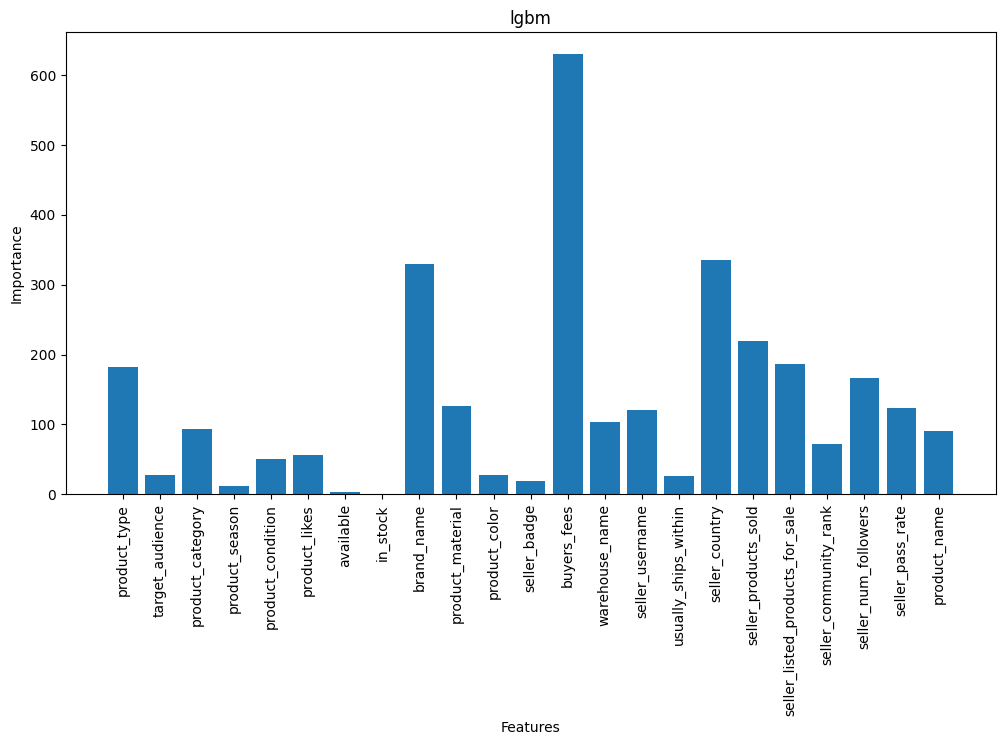

In [230]:
important_features_lgbm= lgbm_model.feature_importances_

plt.title('lgbm')
plt.bar(X_train.columns, important_features_lgbm)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)

In [231]:
import pickle

with open('lgbm_model.pkl', 'wb') as f:
    pickle.dump(lgbm_model, f)

In [233]:
train_data.to_csv('Training_data')